# DEEP LEARNING VS MACHINE LERANING

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)
Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

License
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# DATASET

We are going to create a dataframe from the csv files, which are divided into the training and test subsets.

In [2]:
train = pd.read_csv('/Users/seed/Desktop/git/Deep_learning/DL_Vs_ML/Data/fashion-mnist_train.csv')
test = pd.read_csv('/Users/seed/Desktop/git/Deep_learning/DL_Vs_ML/Data/fashion-mnist_test.csv')

test.head(5) # We do this to see how looks the dataframe

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see above, the first column would be the target variable (y) and the rest are the predictor variables (X) so we are going to create the arrays with the values of each feature (Divided in train and test) in one hand, and in the other with the values of the target (y) for tarining and test subsets.

In [3]:
X_train = train[list(train.columns)[1:]].values
y_train = train['label'].values

X_test = (test[list(test.columns)[1:]].values)
y_test = test['label'].values

# MACHHINE LEARNING

I have choosen a Random Forest classifier, because it's an essemble of decission trees classifier (n_estimators) that is a technique with very good results and the preprocessing of the data is minimum, in fact passing the dataframe to an array would be enough. 

In [4]:
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_leaf_nodes=50, n_jobs=-1).fit(X_train, y_train)

We are going to use entropy because the size of the datset it's not too huge, and entropy tens to produce slightly more balanced trees (Gini trend to isolate the most frequent class in his ownn branch of the tree)

We have selected an essemble with 250 decission trees with 20 leaf nodes (nodes that hasn't branches down) and using al CPU's cores (n_jobs) availables for calculating.

After create the classifier, we are goint to fit it with the training data.

In [5]:
rf_clf.score(X_test, y_test)

0.8085

In [6]:
cross = cross_val_score(rf_clf, X_train, y_train, cv=6)

def mean_crossval_kfolds(x):
    avg_score = 0
    for i in x:
        avg_score += i/len(x)

    print(' Averaged score: ', avg_score, '\n', 'k-folds scores: ', x)

mean_crossval_kfolds(x=cross)

 Averaged score:  0.8129666666666667 
 k-folds scores:  [0.8159 0.8105 0.8073 0.8169 0.8164 0.8108]


Calling the score method of Random Forest Classifier has an output of 80,78 % of accuracy determining over the tests. 
 
After get the score, to check how effectively the algorithm generalizes in his predictions, we did  cross validation in 6 k-folds (The model is going to split the dataset in 6 subsets, training each separately and launching predictions with one of the trained subsets to the rest each time). As we cansee the k-fo0lds score are very similar between them, and the averaged score for the 6 k-fols is 81,21 %.

So we can trust in our model when says that predicts the classes in the fashion MNIST dataset with an around 80 % of precission.

# DEEP LEARNING

Firts of all we must adapt the training and the test data for feeding the algorithm: 

- we are going to normalize the data divided each feature by 255: 3 colour channels of 8 bit are equal 2**8=256 without taking into account the 0, so if we have a range for the values between 0 to 255. So if we divide the feature values by 255 the range values will be between 0 and 1.and

- We have specified in the input layer that the data that we are going to pass it have shape of 1 row per feature (There are 784 features or predictors).

In [7]:
X_trainB, X_testB = X_train/255, X_test/255

# create train and validation datasets
X_trainB, X_val, y_train, y_val = train_test_split(X_trainB, y_train, test_size=0.2)

# reshape the inputs
X_trainB = X_trainB.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)

### Creating the neural network

We are going to create a very simple neuronal network with only 2 hidden layers.

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784,]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
training = model.fit(x=X_trainB, y=y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7470 - accuracy: 0.7546 - val_loss: 0.5498 - val_accuracy: 0.8046
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5067 - accuracy: 0.8244 - val_loss: 0.4617 - val_accuracy: 0.8382
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4603 - accuracy: 0.8390 - val_loss: 0.4497 - val_accuracy: 0.8366
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4330 - accuracy: 0.8500 - val_loss: 0.4198 - val_accuracy: 0.8462
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4126 - accuracy: 0.8563 - val_loss: 0.4026 - val_accuracy: 0.8540
Epoch 6/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3964 - accuracy: 0.8618 - val_loss: 0.3915 - val_accuracy: 0.8606
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3814 - accuracy: 0.8668 - val_loss: 0.3806 - val_accuracy:

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 66.1187 - accuracy: 0.8425


[66.11869812011719, 0.8424999713897705]

### Visualizing the perfomance of the model

Text(0, 0.5, 'metrics value')

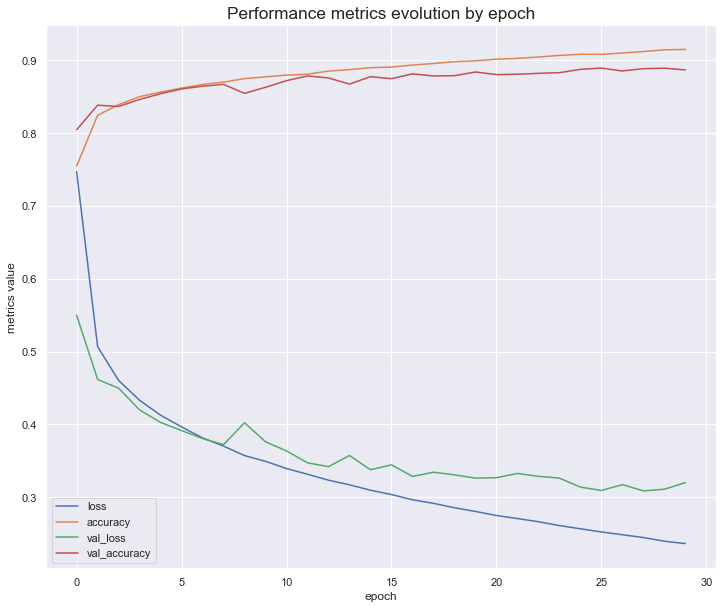

In [11]:
pd.DataFrame(training.history).plot(figsize=(12,10))
plt.title("Performance metrics evolution by epoch", size='xx-large')
plt.xlabel("epoch")
plt.ylabel("metrics value")